Step-1 : Installing Required Libraries

In [25]:
!pip install pandas scikit-learn matplotlib seaborn nltk

step-2 : Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

 step-3 : Load Dataset

In [27]:
# Download sample IMDb reviews dataset (small subset for demo)
!wget https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv -O sentiment_data.csv

# Load dataset
df = pd.read_csv("sentiment_data.csv")
df = df[['label', 'tweet']]  # Keep only relevant columns
df.head()


--2025-06-21 07:41:10--  https://raw.githubusercontent.com/dD2405/Twitter_Sentiment_Analysis/master/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103165 (3.0M) [text/plain]
Saving to: ‘sentiment_data.csv’

sentiment_data.csv  100%[===================>]   2.96M  --.-KB/s    in 0.05s   

2025-06-21 07:41:11 (57.6 MB/s) - ‘sentiment_data.csv’ saved [3103165/3103165]



,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


step-4 : Preprocessing Text


In [28]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove @ and #
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\d+', '', text)  # remove digits
    return text

# Apply cleaning
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

# Optional: Remove stopwords and apply stemming
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['processed_tweet'] = df['cleaned_tweet'].apply(preprocess)
df[['tweet', 'processed_tweet']].head()


,tweet,processed_tweet
0,@user when a father is dysfunctional and is s...,user father dysfunct selfish drag kid dysfunct...
1,@user @user thanks for #lyft credit i can't us...,user user thank lyft credit cant use caus dont...
2,bihday your majesty,bihday majesti
3,#model i love u take with u all the time in ...,model love u take u time urð ðððð ððð
4,factsguide: society now #motivation,factsguid societi motiv


step-5 : Feature Extraction (TF-IDF)


In [29]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['processed_tweet']).toarray()
y = df['label']


step-6 :Train-Test Split


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


step-7 : Train the Model

In [31]:
# Logistic Regression for binary classification
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


 step-8 : Evaluate the Model

Accuracy: 0.9505709369623025

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      5937
           1       0.91      0.34      0.50       456

    accuracy                           0.95      6393
   macro avg       0.93      0.67      0.73      6393
weighted avg       0.95      0.95      0.94      6393



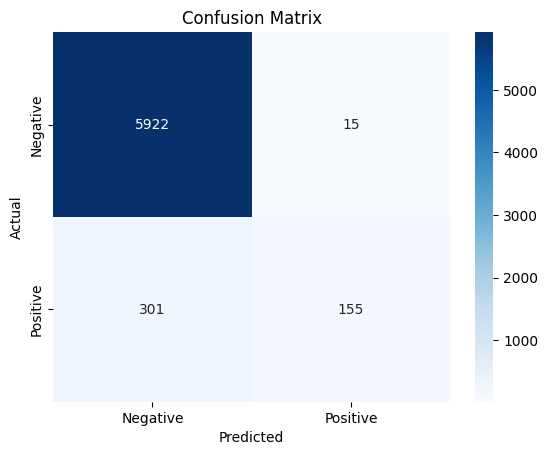

In [32]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
